In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv('diamond_train.csv')
test = pd.read_csv('diamond_test.csv')

In [3]:
train.shape, test.shape

((5400, 9), (600, 8))

In [4]:
train.head()

,ID,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,0,0.83,Very Good,H,VS2,G,EX,GIA,3276
1,1,1.09,Very Good,F,VVS1,VG,VG,GIA,10463
2,2,2.08,Ideal,E,SI1,EX,EX,GIA,23085
3,3,1.00,Very Good,H,VS1,VG,G,GIA,5625
4,4,2.02,Very Good,I,VS2,VG,VG,GIA,15895


In [5]:
test.head()

,ID,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report
0,5400,1.58,Ideal,H,VS2,EX,VG,GIA
1,5401,1.63,Ideal,G,VS1,EX,EX,GIA
2,5402,1.33,Ideal,G,VVS2,EX,EX,GIA
3,5403,1.06,Very Good,I,SI1,VG,EX,GIA
4,5404,1.01,Very Good,H,VVS2,EX,VG,GIA


In [6]:
# drop id column
train.drop(['ID'], axis=1, inplace=True)
train.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,0.83,Very Good,H,VS2,G,EX,GIA,3276
1,1.09,Very Good,F,VVS1,VG,VG,GIA,10463
2,2.08,Ideal,E,SI1,EX,EX,GIA,23085
3,1.00,Very Good,H,VS1,VG,G,GIA,5625
4,2.02,Very Good,I,VS2,VG,VG,GIA,15895


In [7]:
# drop id column
test.drop(['ID'], axis=1, inplace=True)
test.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report
0,1.58,Ideal,H,VS2,EX,VG,GIA
1,1.63,Ideal,G,VS1,EX,EX,GIA
2,1.33,Ideal,G,VVS2,EX,EX,GIA
3,1.06,Very Good,I,SI1,VG,EX,GIA
4,1.01,Very Good,H,VVS2,EX,VG,GIA


In [9]:
# Separate the DataFrame into numerical and categorical parts
categorical_cols = train.columns.drop(['Carat Weight', 'Price'])

# Apply get_dummies to only categorical columns
dummies = pd.get_dummies(train[categorical_cols]).astype(int)

# Concatenate the dummies DataFrame with the original numerical columns
train = pd.concat([train[['Price', 'Carat Weight']], dummies], axis=1)

train.head()

,Price,Carat Weight,Cut_Fair,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_D,Color_E,Color_F,...,Polish_EX,Polish_G,Polish_ID,Polish_VG,Symmetry_EX,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_AGSL,Report_GIA
0,3276,0.83,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,1
1,10463,1.09,0,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,1
2,23085,2.08,0,0,1,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
3,5625,1.00,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1
4,15895,2.02,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [10]:
train.shape

(5400, 30)

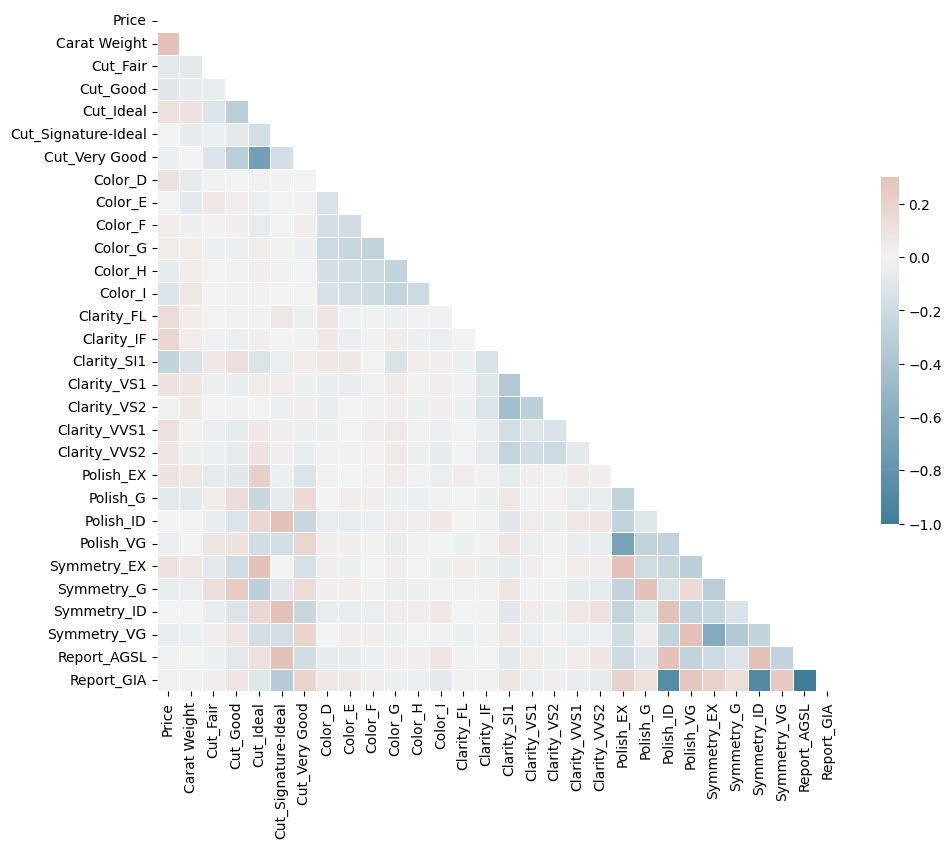

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calculate the correlation matrix
corr = train.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [12]:
X = train.drop(columns=['Price'])  # all columns except 'Price' are features.
y = train['Price']  # 'Price' is the target.

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
# Create a Linear Regression model.
model = LinearRegression()

In [15]:
# Fit the model to the training data.
model.fit(X, y)

LinearRegression()

In [16]:
test.columns

Index(['Carat Weight', 'Cut', 'Color', 'Clarity', 'Polish', 'Symmetry',
       'Report'],
      dtype='object')

In [17]:
# Separate the DataFrame into numerical and categorical parts
categorical_cols = test.columns.drop(['Carat Weight'])

print(categorical_cols)

# Apply get_dummies to only categorical columns
dummies = pd.get_dummies(test[categorical_cols]).astype(int)

# Concatenate the dummies DataFrame with the original numerical columns
test = pd.concat([test[['Carat Weight']], dummies], axis=1)

test.head()

Index(['Cut', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Report'], dtype='object')


,Carat Weight,Cut_Fair,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_D,Color_E,Color_F,Color_G,...,Polish_EX,Polish_G,Polish_ID,Polish_VG,Symmetry_EX,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_AGSL,Report_GIA
0,1.58,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
1,1.63,0,0,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1.33,0,0,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
3,1.06,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
4,1.01,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [18]:
test.shape

(600, 28)

In [19]:
# Find columns in train that are not in test
missing_columns = set(train.columns) - set(test.columns)
missing_columns

{'Clarity_FL', 'Price'}

In [ ]:
# Predict the Price on the test data.
# y_pred = model.predict(test) 
# #this will throw an error because the column Clarify_FL is missing in test dataset

In [20]:
test['Clarity_FL'] = 0

In [ ]:
# y_pred = model.predict(test) 
# this will fail because columns are not in same order

In [21]:
train.columns

Index(['Price', 'Carat Weight', 'Cut_Fair', 'Cut_Good', 'Cut_Ideal',
       'Cut_Signature-Ideal', 'Cut_Very Good', 'Color_D', 'Color_E', 'Color_F',
       'Color_G', 'Color_H', 'Color_I', 'Clarity_FL', 'Clarity_IF',
       'Clarity_SI1', 'Clarity_VS1', 'Clarity_VS2', 'Clarity_VVS1',
       'Clarity_VVS2', 'Polish_EX', 'Polish_G', 'Polish_ID', 'Polish_VG',
       'Symmetry_EX', 'Symmetry_G', 'Symmetry_ID', 'Symmetry_VG',
       'Report_AGSL', 'Report_GIA'],
      dtype='object')

In [22]:
test.columns

Index(['Carat Weight', 'Cut_Fair', 'Cut_Good', 'Cut_Ideal',
       'Cut_Signature-Ideal', 'Cut_Very Good', 'Color_D', 'Color_E', 'Color_F',
       'Color_G', 'Color_H', 'Color_I', 'Clarity_IF', 'Clarity_SI1',
       'Clarity_VS1', 'Clarity_VS2', 'Clarity_VVS1', 'Clarity_VVS2',
       'Polish_EX', 'Polish_G', 'Polish_ID', 'Polish_VG', 'Symmetry_EX',
       'Symmetry_G', 'Symmetry_ID', 'Symmetry_VG', 'Report_AGSL', 'Report_GIA',
       'Clarity_FL'],
      dtype='object')

In [23]:
# Extract the column order from the train DataFrame, excluding the 'Price' column
column_order = [col for col in train.columns if col != 'Price']

# Reorder the columns in the test DataFrame to match the train DataFrame's order
test = test.reindex(columns=column_order)

test.head()

,Carat Weight,Cut_Fair,Cut_Good,Cut_Ideal,Cut_Signature-Ideal,Cut_Very Good,Color_D,Color_E,Color_F,Color_G,...,Polish_EX,Polish_G,Polish_ID,Polish_VG,Symmetry_EX,Symmetry_G,Symmetry_ID,Symmetry_VG,Report_AGSL,Report_GIA
0,1.58,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
1,1.63,0,0,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1.33,0,0,1,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,1
3,1.06,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
4,1.01,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1


In [24]:
# now this will work bcoz all features present and in same order
y_pred = model.predict(test)

In [25]:
# create dataframe for predictions for Kaggle

# Create the ID column starting from 5400
ids = np.arange(5400, 5400 + len(y_pred))

# Create the DataFrame
predictions = pd.DataFrame({'ID': ids, 'Price': y_pred})

predictions.head()

,ID,Price
0,5400,13948.0
1,5401,18288.0
2,5402,14176.0
3,5403,808.0
4,5404,6036.0


In [26]:
# save to csv file
# predictions.to_csv('diamond_price_predictions.csv', index=False)

# A better way using sklearn OneHotEncoding

In [27]:
train = pd.read_csv('diamond_train.csv')
test = pd.read_csv('diamond_test.csv')

In [28]:
train.head()

,ID,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,0,0.83,Very Good,H,VS2,G,EX,GIA,3276
1,1,1.09,Very Good,F,VVS1,VG,VG,GIA,10463
2,2,2.08,Ideal,E,SI1,EX,EX,GIA,23085
3,3,1.00,Very Good,H,VS1,VG,G,GIA,5625
4,4,2.02,Very Good,I,VS2,VG,VG,GIA,15895


In [29]:
test.head()

,ID,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report
0,5400,1.58,Ideal,H,VS2,EX,VG,GIA
1,5401,1.63,Ideal,G,VS1,EX,EX,GIA
2,5402,1.33,Ideal,G,VVS2,EX,EX,GIA
3,5403,1.06,Very Good,I,SI1,VG,EX,GIA
4,5404,1.01,Very Good,H,VVS2,EX,VG,GIA


In [30]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [31]:
# Drop 'ID' column from train and test
train = train.drop('ID', axis=1)
test = test.drop('ID', axis=1)

# Separate features and target from train
X_train = train.drop('Price', axis=1)
y_train = train['Price']

In [32]:
# Categorical features to be one-hot encoded
categorical_features = ['Cut', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Report']

# Create a column transformer with OneHotEncoder for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Keep all other columns
)

In [33]:
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Cut', 'Color', 'Clarity', 'Polish',
                                  'Symmetry', 'Report'])])

In [34]:
# Create a pipeline with preprocessing and the model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [35]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Cut', 'Color', 'Clarity',
                                                   'Polish', 'Symmetry',
                                                   'Report'])])),
                ('regressor', LinearRegression())])

In [36]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Cut', 'Color', 'Clarity',
                                                   'Polish', 'Symmetry',
                                                   'Report'])])),
                ('regressor', LinearRegression())])

In [37]:
# Predict the prices on the test data
test_predictions = pipeline.predict(test)
test_predictions

array([ 1.40324652e+04,  1.80991642e+04,  1.41153939e+04,  9.03369866e+02,
        6.09767625e+03,  2.32050228e+04,  2.43164593e+03,  9.12744109e+03,
        1.30156703e+04, -3.32922835e+02,  2.39907569e+04,  2.71696470e+04,
        9.59118415e+03,  2.95322040e+03,  1.81204750e+04,  4.51453949e+03,
        1.78669372e+04,  1.40294715e+03,  2.81957537e+03,  3.14371013e+04,
        7.24135573e+03,  9.39705514e+03,  7.36018049e+03,  3.36187413e+04,
        1.39358415e+04,  7.03678533e+03,  1.56613189e+04,  2.00546780e+03,
        8.58732438e+03,  2.72887306e+04,  2.82251725e+03,  7.87274628e+03,
        2.54813640e+03,  1.11081541e+04,  5.64188708e+03,  1.60405748e+04,
        1.91605984e+04,  1.29629901e+04,  1.96106803e+04,  5.31505287e+03,
       -3.26461434e+02,  3.60280217e+03,  5.46668269e+03,  2.01259335e+04,
        9.99689204e+03,  1.38464857e+04,  3.93179249e+03,  1.20786145e+03,
        1.30267916e+04,  1.58450435e+04,  2.54178074e+04,  7.10516354e+03,
        1.77546559e+04,  

In [46]:
# create dataframe for predictions for Kaggle

# Create the ID column starting from 5400
ids = np.arange(5400, 5400 + len(test_predictions))

# Create the DataFrame
predictions = pd.DataFrame({'ID': ids, 'Price': test_predictions})

predictions.head()

,ID,Price
0,5400,14032.465179
1,5401,18099.164226
2,5402,14115.393889
3,5403,903.369866
4,5404,6097.676249


In [47]:
predictions.to_csv('diamond_price_predictions.csv', index=False)

# Some Diagnostic Plots to see linearity assumptions

In [48]:
y_true_labels = pd.read_csv('diamond_test_labelled.csv')['Price']
y_true_labels

0      11419
1      16241
2      12345
3       4507
4       5908
       ...  
595     5779
596     9572
597     3914
598    13843
599    25894
Name: Price, Length: 600, dtype: int64

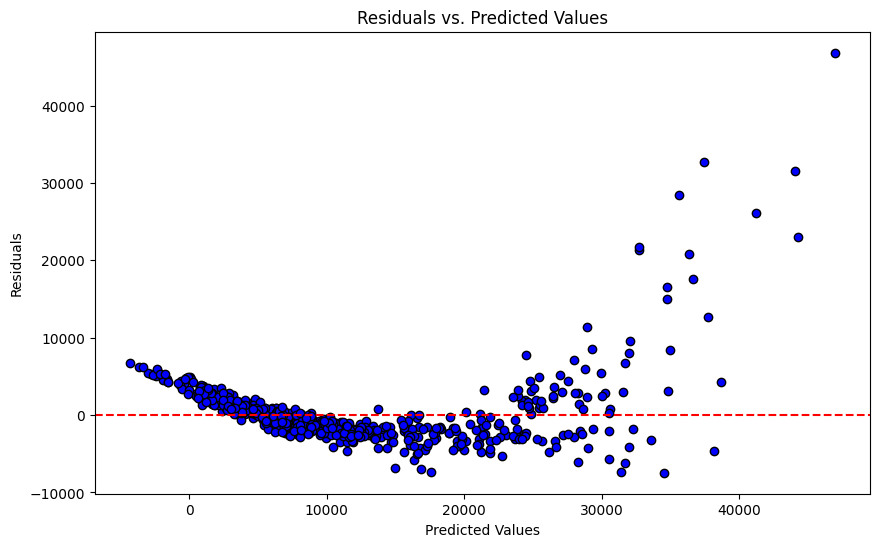

In [49]:
import matplotlib.pyplot as plt

# Assuming y is your observed values and y_pred are the predictions from your model
residuals = y_true_labels - test_predictions

# Create the residuals plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at 0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

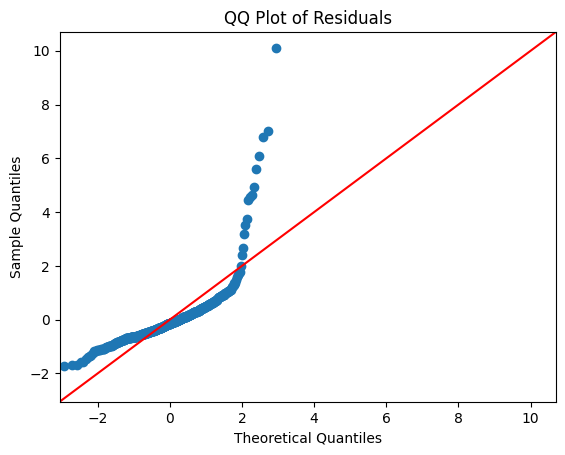

In [50]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming 'residuals' is your residuals
fig = sm.qqplot(residuals, line='45', fit=True)
plt.title('QQ Plot of Residuals')
plt.show()

# Now to improve the model!!

In [51]:
train = pd.read_csv('diamond_train.csv')
test = pd.read_csv('diamond_test.csv')

In [52]:
train.head()

,ID,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,0,0.83,Very Good,H,VS2,G,EX,GIA,3276
1,1,1.09,Very Good,F,VVS1,VG,VG,GIA,10463
2,2,2.08,Ideal,E,SI1,EX,EX,GIA,23085
3,3,1.00,Very Good,H,VS1,VG,G,GIA,5625
4,4,2.02,Very Good,I,VS2,VG,VG,GIA,15895


In [53]:
test.head()

,ID,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report
0,5400,1.58,Ideal,H,VS2,EX,VG,GIA
1,5401,1.63,Ideal,G,VS1,EX,EX,GIA
2,5402,1.33,Ideal,G,VVS2,EX,EX,GIA
3,5403,1.06,Very Good,I,SI1,VG,EX,GIA
4,5404,1.01,Very Good,H,VVS2,EX,VG,GIA


In [54]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor

In [55]:
# Drop 'ID' column from train and test
train = train.drop('ID', axis=1)
test = test.drop('ID', axis=1)

# Separate features and target from train
X_train = train.drop('Price', axis=1)
y_train = train['Price']

In [56]:
# Categorical features to be one-hot encoded
categorical_features = ['Cut', 'Color', 'Clarity', 'Polish', 'Symmetry', 'Report']

In [57]:
# Create a column transformer with OneHotEncoder for categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Keep all other columns
)

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat', OneHotEncoder(handle_unknown='ignore'),
                                 ['Cut', 'Color', 'Clarity', 'Polish',
                                  'Symmetry', 'Report'])])

In [59]:
# Define the model as a transformed target regressor
model = TransformedTargetRegressor(
    regressor=LinearRegression(),
    func=np.log1p,  # Applies log(1 + x)
    inverse_func=np.expm1  # Applies exp(x) - 1, the inverse of log(1 + x)
)

model

TransformedTargetRegressor(func=<ufunc 'log1p'>, inverse_func=<ufunc 'expm1'>,
                           regressor=LinearRegression())

In [60]:
# Create a pipeline with preprocessing and the transformed target model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', model)
])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Cut', 'Color', 'Clarity',
                                                   'Polish', 'Symmetry',
                                                   'Report'])])),
                ('regressor',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=LinearRegression()))])

In [61]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Cut', 'Color', 'Clarity',
                                                   'Polish', 'Symmetry',
                                                   'Report'])])),
                ('regressor',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'expm1'>,
                                            regressor=LinearRegression()))])

In [62]:
# Predict the prices on the test data
test_predictions = pipeline.predict(test)

In [63]:
test_predictions

array([11315.3429084 , 15206.66039301, 11603.37685317,  3917.39490918,
        6298.17127584, 22123.49879872,  4188.90131514,  7687.59743251,
       10004.71947319,  3960.72374103, 23817.75423797, 28424.86076754,
        7036.84791891,  5025.8611229 , 15984.45229367,  5114.77527943,
       13885.98192297,  4151.02999704,  5057.70951968, 41193.1630584 ,
        6349.12449387,  8615.78626966,  6801.8411749 , 41033.26259574,
       11236.95064461,  5612.30940687, 11156.75401302,  4844.83029494,
        7097.25292735, 31669.40814687,  4778.36157695,  7251.99825005,
        4560.15394544,  9047.24659063,  5348.72454941, 12245.25018721,
       11715.60066548,  9978.26693046, 16760.58585412,  6015.33975355,
        3772.47096332,  4664.14236586,  5301.54430956, 17783.77599299,
        7319.18357665, 10653.81207413,  4752.59269047,  3822.2011078 ,
       10197.74223713, 12645.27968401, 26167.56678407,  5967.42574642,
       15553.02652661, 20502.22511216,  4352.60372427, 12917.60154183,
      

In [64]:
# create dataframe for predictions for Kaggle

# Create the ID column starting from 5400
ids = np.arange(5400, 5400 + len(test_predictions))

# Create the DataFrame
predictions = pd.DataFrame({'ID': ids, 'Price': test_predictions})

predictions.head()

,ID,Price
0,5400,11315.342908
1,5401,15206.660393
2,5402,11603.376853
3,5403,3917.394909
4,5404,6298.171276


In [65]:
# predictions.to_csv('diamond_price_predictions.csv', index=False)

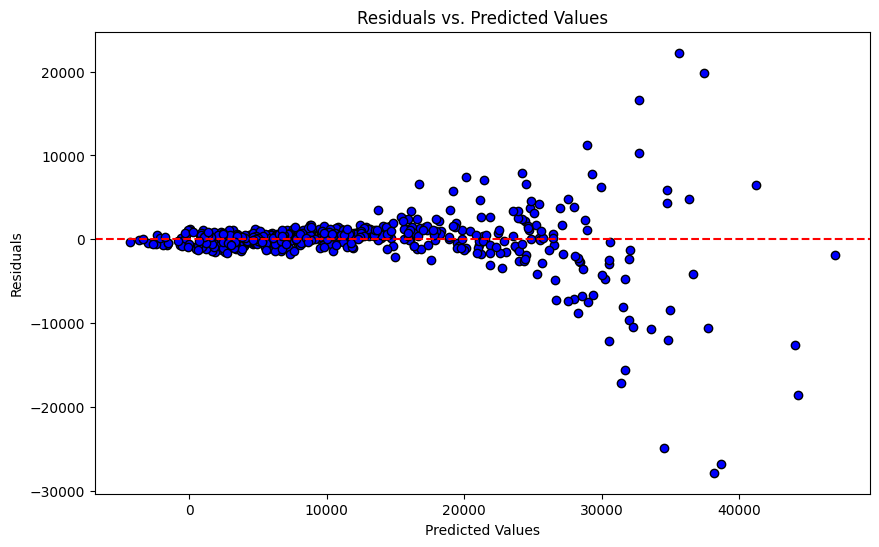

In [66]:
import matplotlib.pyplot as plt

# Assuming y is your observed values and y_pred are the predictions from your model
residuals = y_true_labels - test_predictions

# Create the residuals plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at 0
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

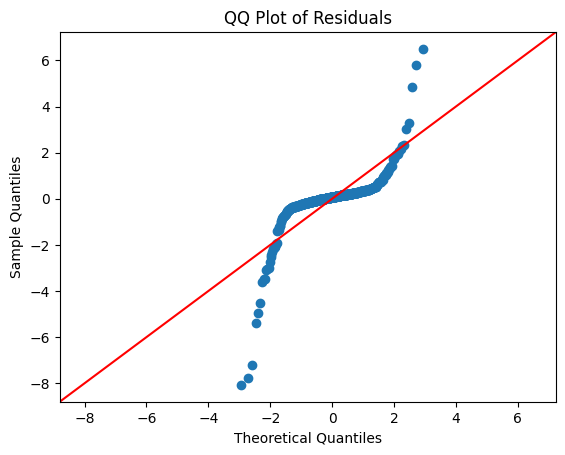

In [67]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Assuming 'residuals' is your residuals
fig = sm.qqplot(residuals, line='45', fit=True)
plt.title('QQ Plot of Residuals')
plt.show()

<Axes: >

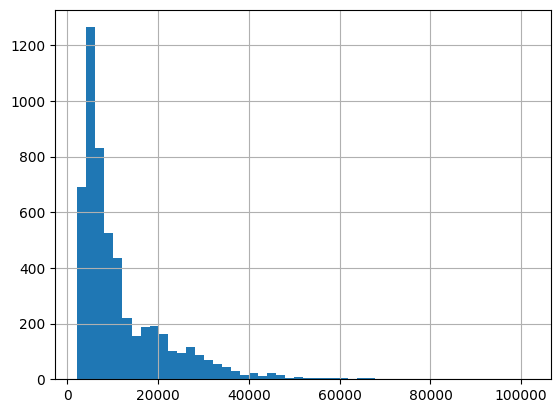

In [68]:
train['Price'].hist(bins=50)

<Axes: >

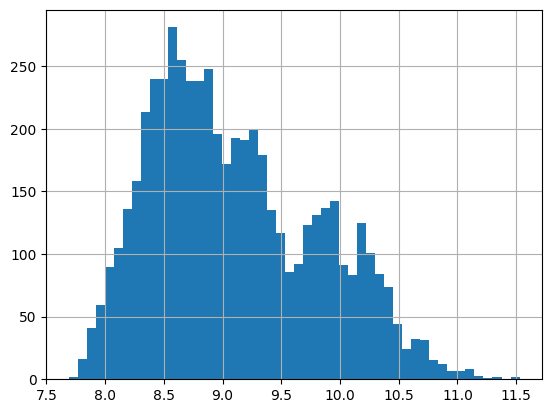

In [69]:
logged_price = np.log1p(train['Price'])
logged_price.hist(bins=50)